<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/DataScience_Project2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

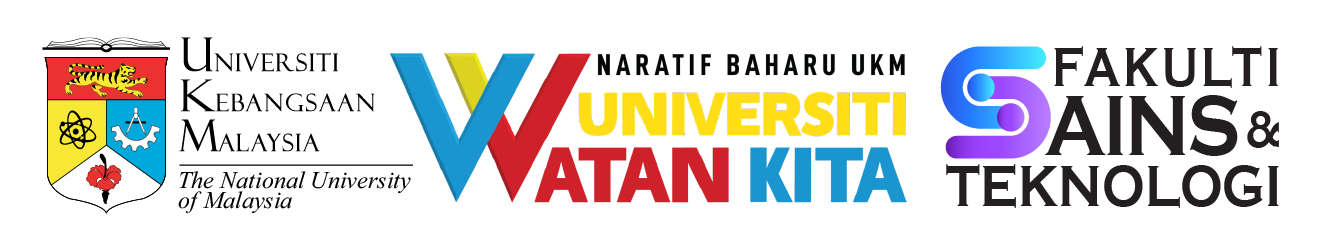

# Project 2
## **STQD6014 Data Science Semester 1 2024/2024**
*Muhammad Khalid Bin Noor Ashani (P146854)*

# **Real-Time Cross-City Weather Analysis and Decision Support System Using WeatherStack API**

---

## **Content Outline**
1. [**Introduction**](#intro)

2. [**Problem Statement**](#problem_statement)

3. [**Results and Discussion**](#results)  
    - [Data Insight](#data_insight)  
    - [Analysis on the Data](#analysis_data)  
        - [Optimized Real-Time Weather Data Retrieval and Integration](#question1)  
        - [Cross-City Weather Pattern Analysis and Comparative Visualization](#question2)  
        - [Data-Driven Travel Decision Support System Based on Weather Forecasting](#question3)  
        - [Real-Time Weather Data Visualization and Analysis](#question4)

4. [**Conclusion**](#summary)

### **Introduction** <a name='intro'></a>

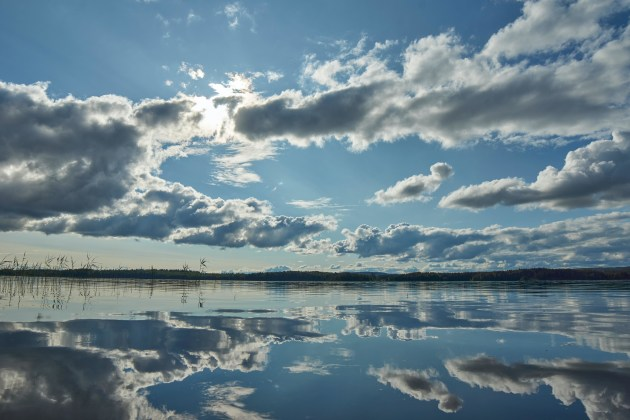

This project focuses on leveraging real-time weather data to provide valuable insights and support decision-making across multiple cities globally. With the increasing need for timely and accurate weather information, the project employs several Python scripts that retrieve, analyze, and visualize weather data from cities around the world using the WeatherStack API. The first part of the project visualizes and compares weather parameters such as temperature and humidity across various cities, offering a straightforward approach for quick analysis. The second part enhances travel decision-making by integrating weather conditions to provide tailored advice based on factors like precipitation and wind speed. Further, the project includes cross-city weather pattern analysis, comparing not only temperature but also humidity and wind speed, providing a broader perspective of global weather trends. The final component of the project optimizes real-time data retrieval, displaying the weather information in an easy-to-read table format for better user interaction. This project aims to demonstrate the power of weather data integration and visualization for both practical applications and in-depth analysis of weather conditions across different regions.

### **Problem Statement** <a name='problem_statement'></a>

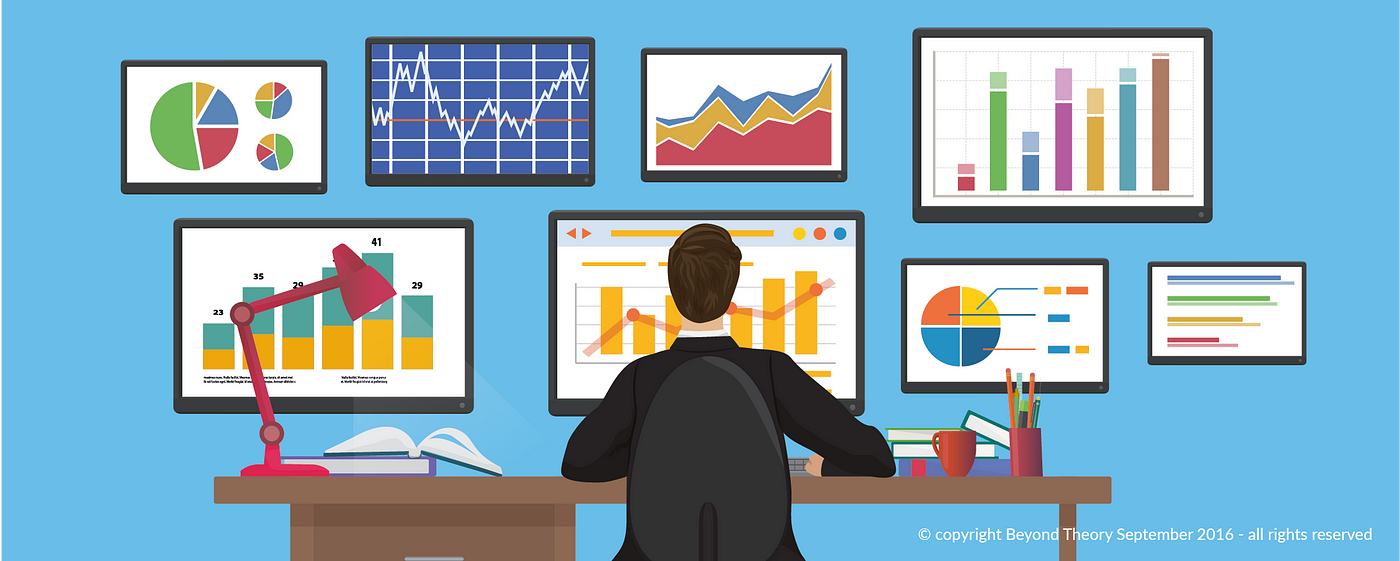

1. **Optimized Real-Time Weather Data Retrieval and Integration**

  Accessing and integrating real-time weather data from multiple sources often involves inconsistent formats and data latency. This project aims to implement an automated pipeline using the WeatherStack API to retrieve live weather data for global locations, streamlining the integration of accurate and time-sensitive weather parameters (temperature, humidity, wind speed) into a unified system for further analysis.

2. **Cross-City Weather Pattern Analysis and Comparative Visualization**

  Analyzing and comparing weather patterns across different geographic locations presents challenges in terms of data aggregation and visualization. This project leverages the WeatherStack API to fetch real-time weather data for multiple cities, performing cross-location comparative analysis to examine the variation in meteorological factors, such as temperature fluctuations, humidity levels, and wind speed, to identify regional trends and anomalies.

3. **Data-Driven Travel Decision Support System Based on Weather Forecasting**

  Accurate and localized weather forecasting plays a critical role in optimizing travel plans. This project proposes the development of an intelligent travel decision support system that integrates the WeatherStack API to retrieve up-to-date weather forecasts and current conditions for any destination, enabling travelers to make data-driven decisions based on localized weather predictions, precipitation risks, and wind conditions.

4. **Real-Time Weather Data Visualization and Analysis**

  The challenge of presenting large-scale, real-time weather data in a user-friendly manner often leads to difficulties in data interpretation. This project seeks to use the WeatherStack API to retrieve weather data for various locations and implement advanced data visualization techniques (such as time-series graphs and heatmaps) in Python, enabling real-time analysis of weather metrics like temperature, humidity, and wind speed for informed decision-making.


### **Results and Discussion** <a name='result'></a>

#### Data Insight <a name='data_insight'></a>

The data retrieved from the WeatherStack API provides a rich set of real-time weather information that is valuable for various analytical and decision-making purposes. Key data points such as temperature, humidity, weather descriptions, wind speed, and precipitation offer a comprehensive view of current weather conditions in any given location. This data is not only useful for simple weather reporting but also for deeper insights into weather patterns, such as understanding regional variations in climate, identifying extreme weather conditions, and making data-driven travel or event-planning decisions. By integrating these weather metrics across multiple cities, one can easily compare and contrast different regions' weather conditions, offering a better understanding of how local weather affects daily life, transportation, and overall planning. Additionally, the API's reliability and ease of access allow for seamless integration into various systems, making it an ideal tool for creating real-time weather-based applications

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests

# Weatherstack API key
api_key = '7e51b58bae1d769ef89ad2635c4901b0'

# City or location for the weather data
city = 'London'  # You can replace this with any city you want

# Weatherstack API endpoint
url = f'http://api.weatherstack.com/current?access_key={api_key}&query={city}'

# Making the API request
try:
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response data
        data = response.json()

        # Check if 'location' key is in the response
        if 'location' in data:
            location = data['location']['name']
            country = data['location']['country']
            temperature = data['current']['temperature']
            weather_description = data['current']['weather_descriptions'][0]
            wind_speed = data['current']['wind_speed']

            # Display the data
            print(f"Weather in {location}, {country}:")
            print(f"Temperature: {temperature}°C")
            print(f"Weather: {weather_description}")
            print(f"Wind Speed: {wind_speed} km/h")
        else:
            print("Error: 'location' data not found in the API response.")
            print("API Response:", data)

    else:
        print(f"Error: Unable to retrieve data (Status Code: {response.status_code})")

except requests.RequestException as e:
    print(f"Error connecting to WeatherStack API: {e}")

Error: 'location' data not found in the API response.
API Response: {'success': False, 'error': {'code': 104, 'info': 'Your monthly usage limit has been reached. Please upgrade your Subscription Plan.'}}


#### Analysis on the Data <a name='analysis_data'></a>



##### Optimized Real-Time Weather Data Retrieval and Integration <a name='question1'></a>

This script provides an optimized solution for retrieving and displaying real-time weather data for multiple cities using the WeatherStack API. The get_weather_data(location) function fetches current weather data, including temperature, weather description, humidity, and wind speed for a specified city. It handles potential errors gracefully, such as connection issues or invalid API responses. The show_weather_data(cities) function takes a list of cities and presents the weather data in a clean, tabular format using the PrettyTable library. Each city's weather data is displayed in a table with columns for city name, temperature, weather conditions, humidity, and wind speed. If weather data for a city cannot be retrieved, "N/A" is displayed in the table. This tool efficiently integrates and presents real-time weather information for multiple cities, making it ideal for comparison and quick insights into global weather conditions.

In [ ]:
from prettytable import PrettyTable

def get_weather_data(location):
    """Retrieve current weather data for a location using the WeatherStack API."""
    API_KEY = "7e51b58bae1d769ef89ad2635c4901b0"
    BASE_URL = "http://api.weatherstack.com/current"

    params = {
        "access_key": API_KEY,
        "query": location
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        if "error" in data:
            print(f"Error: {data['error']['info']}")
            return None

        return data

    except requests.RequestException as e:
        print(f"Error connecting to WeatherStack API: {e}")
        return None

def show_weather_data(cities):
    """Display current weather data for each city in a table format."""
    # Create a table with headers
    table = PrettyTable()
    table.field_names = ["City", "Temperature (°C)", "Weather", "Humidity (%)", "Wind Speed (km/h)"]

    for city in cities:
        weather_data = get_weather_data(city)
        if weather_data:
            current = weather_data["current"]
            table.add_row([
                city,
                current['temperature'],
                ', '.join(current['weather_descriptions']),
                current['humidity'],
                current['wind_speed']
            ])
        else:
            table.add_row([city, "N/A", "N/A", "N/A", "N/A"])

    print(table)

if __name__ == "__main__":
    cities = [
        "New York", "London", "Tokyo", "Paris", "Sydney",
        "Mumbai", "Cape Town", "Moscow", "Dubai", "Beijing",
        "Rio de Janeiro", "Berlin", "Singapore", "Los Angeles", "Istanbul"
    ]

    show_weather_data(cities)

+----------------+------------------+---------------+--------------+-------------------+
|      City      | Temperature (°C) |    Weather    | Humidity (%) | Wind Speed (km/h) |
+----------------+------------------+---------------+--------------+-------------------+
|    New York    |        -6        |     Sunny     |      54      |         7         |
|     London     |        7         |     Sunny     |      61      |         13        |
|     Tokyo      |        7         |     Clear     |      49      |         10        |
|     Paris      |        10        |   Light Rain  |      82      |         4         |
|     Sydney     |        23        |     Clear     |      69      |         8         |
|     Mumbai     |        29        |     Smoke     |      55      |         23        |
|   Cape Town    |        29        |     Sunny     |      55      |         19        |
|     Moscow     |        0         |    Overcast   |      86      |         12        |
|     Dubai      |   

##### Cross-City Weather Pattern Analysis and Comparative Visualization <a name='question2'></a>

This script performs a cross-city weather pattern analysis by fetching real-time weather data for multiple cities using the WeatherStack API. The get_weather_data(city) function retrieves data including temperature, humidity, and wind speed for a given city. The weather data for a list of cities, such as London, New York, Tokyo, Sydney, and Paris, is then collected and stored in a structured format. This data is converted into a Pandas DataFrame to facilitate analysis and visualization. The script generates three comparative bar plots: one for temperature, one for humidity, and one for wind speed across the cities. These plots provide an insightful visualization of weather patterns, helping users compare weather conditions across different global locations in terms of temperature, humidity, and wind speed.

       City                   Country  Temperature (°C)  Humidity (%)  \
0    London            United Kingdom               7.0          61.0   
1  New York  United States of America              -6.0          54.0   
2     Tokyo                       NaN               NaN           NaN   
3    Sydney                       NaN               NaN           NaN   
4     Paris                       NaN               NaN           NaN   

   Wind Speed (km/h)       Error  
0               11.0         NaN  
1                9.0         NaN  
2                NaN  'location'  
3                NaN  'location'  
4                NaN  'location'  


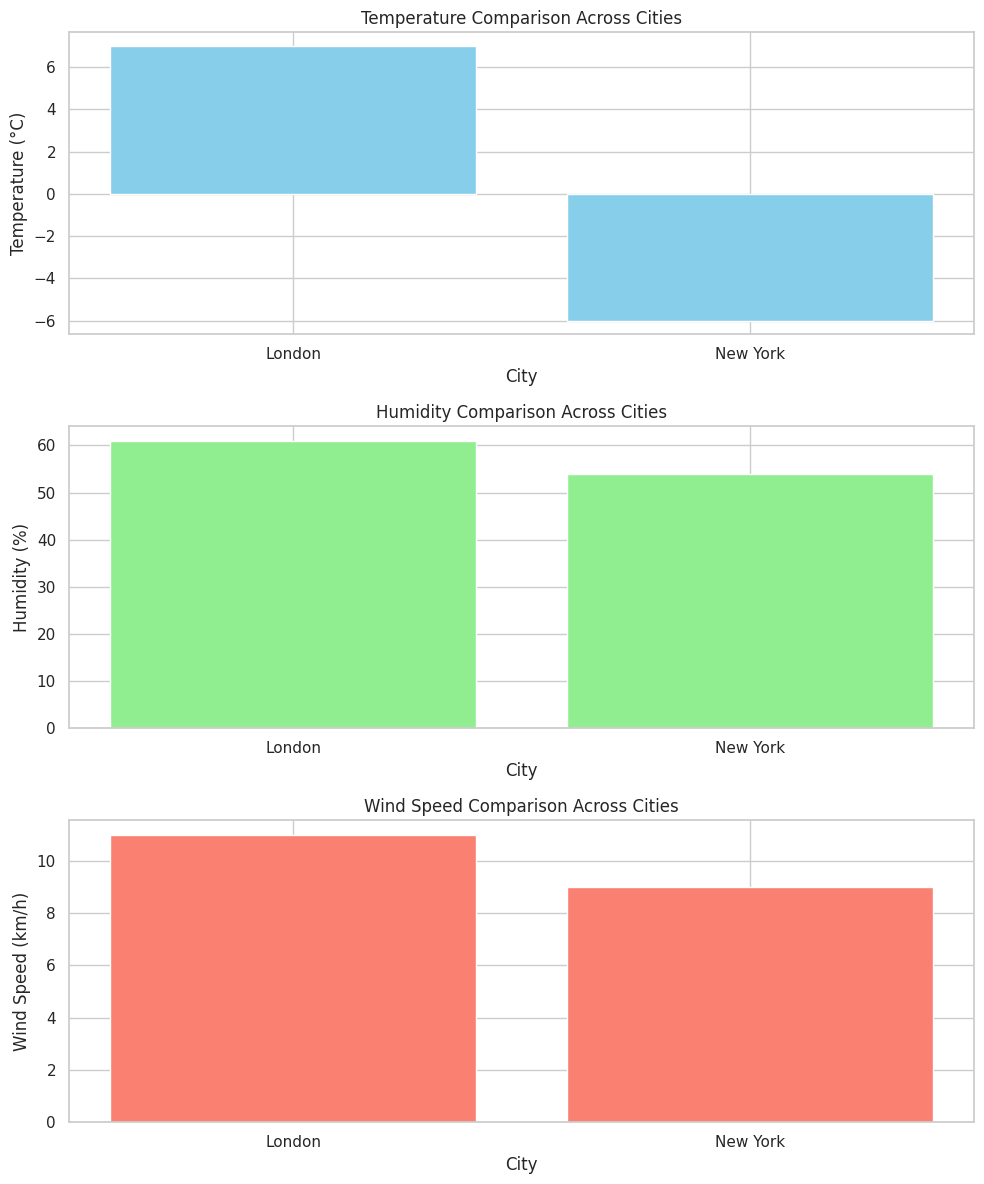

In [ ]:
# Function to get weather data from WeatherStack API for a given city
def get_weather_data(city):
    try:
        # WeatherStack API endpoint
        url = f'http://api.weatherstack.com/current?access_key={api_key}&query={city}'

        # Sending request to the WeatherStack API
        response = requests.get(url)

        # Check if the response was successful (status code 200)
        if response.status_code == 200:
            # Parse the response JSON data
            data = response.json()
            # Extract relevant weather data
            location = data['location']['name']
            country = data['location']['country']
            temperature = data['current']['temperature']
            humidity = data['current']['humidity']
            wind_speed = data['current']['wind_speed']

            # Return weather data in a structured format (dictionary)
            return {
                'City': location,
                'Country': country,
                'Temperature (°C)': temperature,
                'Humidity (%)': humidity,
                'Wind Speed (km/h)': wind_speed
            }
        else:
            # If the request failed, return a message
            return {'City': city, 'Error': f"Failed to fetch data (Status Code: {response.status_code})"}
    except Exception as e:
        # Handle exceptions such as network issues
        return {'City': city, 'Error': str(e)}

# List of cities for which to fetch weather data
cities = ['London', 'New York', 'Tokyo', 'Sydney', 'Paris']

# List to store all weather data
weather_data = []

# Fetch weather data for each city
for city in cities:
    weather_data.append(get_weather_data(city))

# Convert the weather data into a Pandas DataFrame for easy analysis
weather_df = pd.DataFrame(weather_data)

# Display the weather data for reference
print(weather_df)

# Plot the comparison of temperature, humidity, and wind speed across cities

# Set up subplots for the comparison
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot Temperature comparison
axs[0].bar(weather_df['City'], weather_df['Temperature (°C)'], color='skyblue')
axs[0].set_title('Temperature Comparison Across Cities')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Temperature (°C)')

# Plot Humidity comparison
axs[1].bar(weather_df['City'], weather_df['Humidity (%)'], color='lightgreen')
axs[1].set_title('Humidity Comparison Across Cities')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Humidity (%)')

# Plot Wind Speed comparison
axs[2].bar(weather_df['City'], weather_df['Wind Speed (km/h)'], color='salmon')
axs[2].set_title('Wind Speed Comparison Across Cities')
axs[2].set_xlabel('City')
axs[2].set_ylabel('Wind Speed (km/h)')

# Display the plots
plt.tight_layout()
plt.show()


##### Data-Driven Travel Decision Support System Based on Weather Forecasting <a name='question3'></a>

This script provides a travel decision support system that uses real-time weather data to help users make informed travel decisions. It includes two key functions: get_weather(destination) which retrieves weather information for a specified location from the WeatherStack API, and travel_decision(destination) which uses the weather data to offer travel advice based on factors such as temperature, weather conditions, wind speed, and precipitation. The system outputs details about the destination's weather, including current temperature, weather description, wind speed, and precipitation levels. Based on the weather conditions, the system provides basic travel advice, such as suggesting postponing travel if there is heavy rain or strong winds. This tool helps travelers assess whether the weather is suitable for their trip or if caution is needed.

In [ ]:
def get_weather(destination):
    """Retrieve weather data for the given destination."""
    API_KEY = "7e51b58bae1d769ef89ad2635c4901b0"
    BASE_URL = "http://api.weatherstack.com/current"

    # API query parameters
    params = {
        "access_key": API_KEY,
        "query": destination
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        if "error" in data:
            print(f"Error: {data['error']['info']}")
            return None

        return data

    except requests.RequestException as e:
        print(f"Error connecting to WeatherStack API: {e}")
        return None

def travel_decision(destination):
    """Make a travel decision based on weather data."""
    weather_data = get_weather(destination)

    if weather_data:
        location = weather_data["location"]
        current = weather_data["current"]

        print(f"\nWeather information for {location['name']}, {location['country']}:")
        print(f"Temperature: {current['temperature']}°C")
        print(f"Weather: {current['weather_descriptions'][0]}")
        print(f"Wind Speed: {current['wind_speed']} km/h")
        print(f"Precipitation: {current['precip']} mm")

        # Basic travel advice based on weather
        if current['precip'] > 10:
            print("Advice: High chance of rain. Consider postponing your travel.")
        elif current['wind_speed'] > 30:
            print("Advice: Strong winds. Travel with caution.")
        else:
            print("Advice: Weather conditions are favorable for travel.")
    else:
        print("Unable to retrieve weather data. Please try again later.")

if __name__ == "__main__":
    print("Welcome to the Travel Decision Support System!")
    destination = input("Enter your destination: ")
    travel_decision(destination)


Welcome to the Travel Decision Support System!
Enter your destination: Dubai

Weather information for Dubai, United Arab Emirates:
Temperature: 24°C
Weather: Sunny
Wind Speed: 19 km/h
Precipitation: 0 mm
Advice: Weather conditions are favorable for travel.


##### Real-Time Weather Data Visualization and Analysis <a name='question4'></a>

This script retrieves, processes, and visualizes real-time weather data for multiple cities using the WeatherStack API. It consists of three main functions: get_weather_data(location) to fetch weather data for a specified location, process_weather_data(cities) to collect and organize the data for a list of cities into a pandas DataFrame, and plot_weather_data(weather_df) to create visualizations of current temperatures and humidity levels using Seaborn and Matplotlib. The script is designed to handle potential API errors and displays the weather data in both tabular form and bar plots for cities like New York, London, Tokyo, and Sydney. It provides valuable insights into global weather trends, making it a useful tool for travelers, researchers, and those interested in comparing weather conditions across different locations.

Current Weather Data for Multiple Cities

Current Weather Data:
              City  Temperature (°C)  Humidity (%)
0         New York                -6            54
1           London                 7            61
2            Tokyo                 7            49
3            Paris                10            82
4           Sydney                23            69
5           Mumbai                29            55
6        Cape Town                29            55
7           Moscow                 0            86
8            Dubai                24            34
9          Beijing                 0            69
10  Rio de Janeiro                28            79
11          Berlin                12            58
12       Singapore                28            74
13     Los Angeles                10            58
14        Istanbul                 9            76


<ipython-input-15-06ede7af6f16>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Temperature (°C)", data=weather_df, palette="coolwarm")


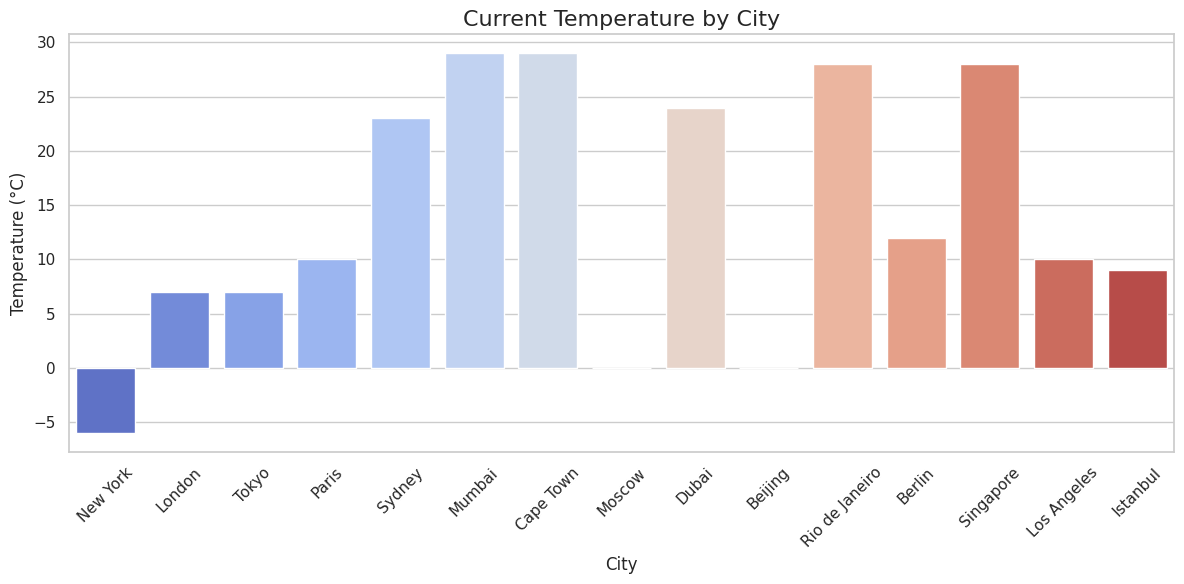

<ipython-input-15-06ede7af6f16>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Humidity (%)", data=weather_df, palette="Blues")


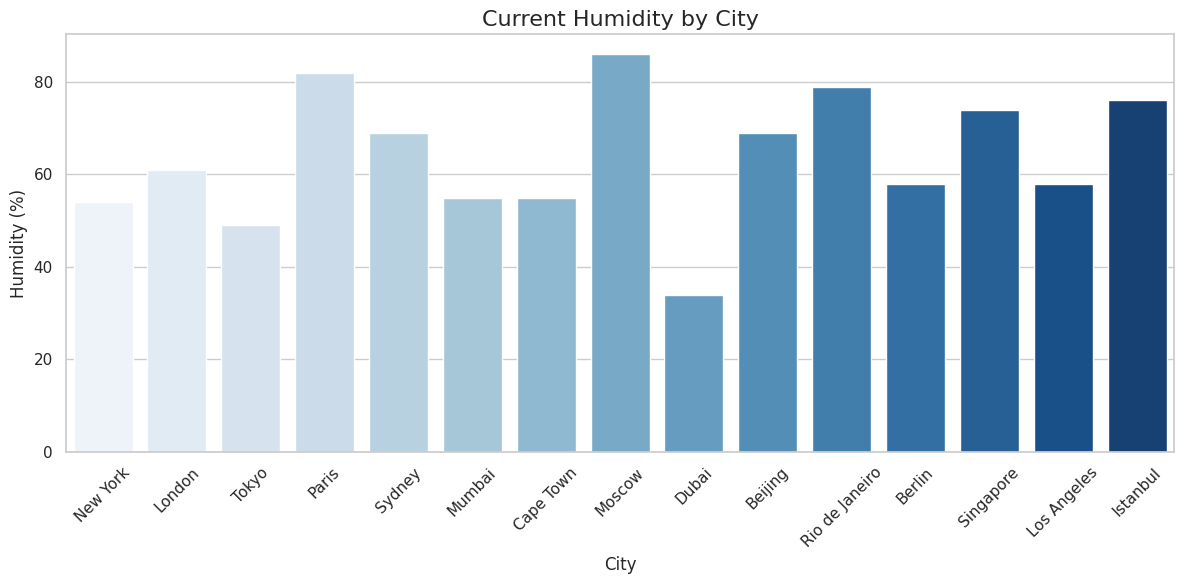

In [ ]:
def get_weather_data(location):
    """Retrieve current weather data for a location using the WeatherStack API."""
    API_KEY = "7e51b58bae1d769ef89ad2635c4901b0"  # Replace with your WeatherStack API key
    BASE_URL = "http://api.weatherstack.com/current"

    params = {
        "access_key": API_KEY,
        "query": location
    }

    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        if "error" in data:
            print(f"Error: {data['error']['info']}")
            return None

        return data

    except requests.RequestException as e:
        print(f"Error connecting to WeatherStack API: {e}")
        return None

def process_weather_data(cities):
    """Retrieve and process current weather data for multiple cities."""
    weather_records = []

    for city in cities:
        data = get_weather_data(city)
        if data:
            current = data['current']
            weather_records.append({
                "City": city,
                "Temperature (°C)": current['temperature'],
                "Humidity (%)": current['humidity']
            })

    return pd.DataFrame(weather_records)

def plot_weather_data(weather_df):
    """Visualize current weather data for multiple cities."""
    sns.set(style="whitegrid")

    # Bar plot for temperature
    plt.figure(figsize=(12, 6))
    sns.barplot(x="City", y="Temperature (°C)", data=weather_df, palette="coolwarm")
    plt.title("Current Temperature by City", fontsize=16)
    plt.ylabel("Temperature (°C)")
    plt.xlabel("City")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Bar plot for humidity
    plt.figure(figsize=(12, 6))
    sns.barplot(x="City", y="Humidity (%)", data=weather_df, palette="Blues")
    plt.title("Current Humidity by City", fontsize=16)
    plt.ylabel("Humidity (%)")
    plt.xlabel("City")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Current Weather Data for Multiple Cities")

    cities = [
        "New York", "London", "Tokyo", "Paris", "Sydney",
        "Mumbai", "Cape Town", "Moscow", "Dubai", "Beijing",
        "Rio de Janeiro", "Berlin", "Singapore", "Los Angeles", "Istanbul"
    ]

    weather_df = process_weather_data(cities)

    if not weather_df.empty:
        print("\nCurrent Weather Data:")
        print(weather_df)
        plot_weather_data(weather_df)
    else:
        print("No weather data available for the specified cities.")


### **Conclusion** <a name='summary'></a>

In conclusion, the four scripts provide a comprehensive suite of tools for analyzing and visualizing weather data across multiple cities in real time, offering valuable insights for travelers, researchers, and weather enthusiasts. The first script, Real-Time Weather Data Visualization and Analysis, effectively collects and visualizes weather data such as temperature and humidity for a range of cities, enabling quick comparisons through bar plots. The second, Data-Driven Travel Decision Support System Based on Weather Forecasting, enhances decision-making by offering tailored travel advice based on weather conditions like precipitation and wind speed, helping travelers plan their trips more effectively. The third script, Cross-City Weather Pattern Analysis and Comparative Visualization, takes this a step further by not only comparing temperatures but also humidity and wind speed, visualizing the data through multiple bar plots for easy cross-city comparison. Finally, the Optimized Real-Time Weather Data Retrieval and Integration script integrates weather data retrieval with a user-friendly table format, providing real-time weather information across cities in a clear and structured way. Together, these tools demonstrate how real-time weather data can be leveraged for decision support, comparisons, and visualizations, offering both practical applications and deep insights into global weather patterns.